### Import libraries:

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load data:

In [2]:
data = pd.read_csv('../../data/clean/data_cleaned.csv')

data.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,pass/fail_math,math_score,pass/fail_reading,reading_score,pass/fail_writing,writing_score,failed_courses,midterm_results,average_grade
0,M,A,high school,standard,yes,passed,67,passed,67,passed,63,good standing,good standing,65.67
1,F,D,no high school,reduced,no,failed,40,failed,59,failed,55,math/reading,summer school,51.33
2,M,E,high school,reduced,no,failed,59,passed,60,failed,50,math/writing,summer school,56.33
3,M,B,high school,standard,no,passed,77,passed,78,passed,68,good standing,good standing,74.33
4,M,E,associate,standard,yes,passed,78,passed,73,passed,68,good standing,good standing,73.00


### X/y and numerical/categorical split:

In [3]:
X = data.drop(['math_score', 'reading_score', 'writing_score', 'average_grade'], axis=1)
y = data['average_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train_numerical = X_train.select_dtypes(np.number)
#X_test_numerical = X_test.select_dtypes(np.number)

X_train_categorical = X_train.select_dtypes(object)
X_test_categorical = X_test.select_dtypes(object)

### Encoding categoricals:

In [4]:
encoder = OneHotEncoder()
encoder.fit(X_train_categorical)

X_train_cat_enc = encoder.transform(X_train_categorical).toarray()
X_train_cat_enc = pd.DataFrame(X_train_cat_enc, columns=encoder.get_feature_names_out())

X_test_cat_enc = encoder.transform(X_test_categorical).toarray()
X_test_cat_enc = pd.DataFrame(X_test_cat_enc, columns=encoder.get_feature_names_out())

### Standarizing numericals:

In [5]:
#scaler = StandardScaler()
#scaler.fit(X_train_numerical)

#X_train_num = scaler.transform(X_train_numerical)
#X_train_num = round(pd.DataFrame(X_train_num, columns=X_train_numerical.columns),4)

#X_test_num = scaler.transform(X_test_numerical)
#X_test_num = round(pd.DataFrame(X_test_num, columns=X_test_numerical.columns),4)
#X_test_num.head()

### Final datasets:

In [6]:
X_train_final = X_train_cat_enc
X_test_final = X_test_cat_enc

### Linear model regressor:

In [7]:
lm = LinearRegression()
lm.fit(X_train_final,y_train)

LinearRegression()

### Predictions:

In [8]:
y_train_pred = lm.predict(X_train_final)
y_test_pred = lm.predict(X_test_final)

### Validating the model:

In [9]:
def model_performance(y_train, y_train_pred, y_test, y_test_pred):

    ME_train = np.mean(y_train-y_train_pred)
    ME_test  = np.mean(y_test-y_test_pred)

    MAE_train = mean_absolute_error(y_train,y_train_pred)
    MAE_test  = mean_absolute_error(y_test,y_test_pred)

    MSE_train = mean_squared_error(y_train,y_train_pred)
    MSE_test  = mean_squared_error(y_test,y_test_pred)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_train_pred) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_test_pred) / y_test)* 100.)

    R2_train = r2_score(y_train,y_train_pred)
    R2_test  = r2_score(y_test,y_test_pred)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_train_pred.tolist()})
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_test_pred.tolist()})

    return performance, df_train, df_test

In [10]:
model_performance(y_train, y_train_pred, y_test, y_test_pred)

(                     Error_metric  Train  Test
 0                      Mean error   0.01 -0.07
 1             Mean absolute error   5.63  5.81
 2              Mean squared error  50.30 53.19
 3         Root mean squared error   7.09  7.29
 4  Mean absolute percentual error   8.67  8.86
 5                              R2   0.76  0.74,
      Real  Predicted
 0   76.00      77.14
 1   59.67      64.27
 2   82.33      81.39
 3   42.67      42.50
 4   48.00      47.64
 ..    ...        ...
 695 76.33      74.78
 696 71.33      74.20
 697 93.33      76.72
 698 84.33      78.62
 699 78.00      77.27
 
 [700 rows x 2 columns],
      Real  Predicted
 0   76.67      82.31
 1   82.00      76.52
 2   52.00      46.53
 3   92.00      78.47
 4   69.67      76.50
 ..    ...        ...
 295 65.00      75.05
 296 80.00      73.95
 297 51.33      44.20
 298 88.33      80.69
 299 44.67      47.86
 
 [300 rows x 2 columns])

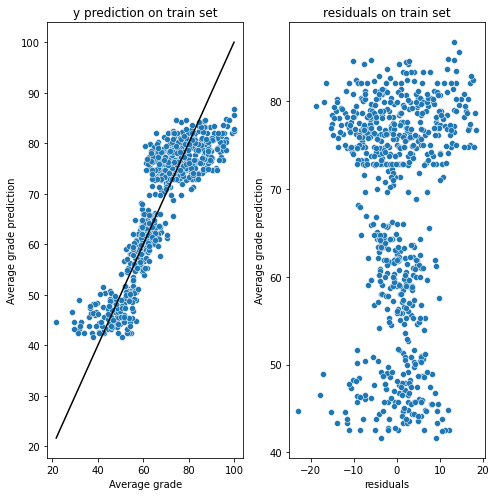

In [11]:
residuals_train = y_train - y_train_pred

fig, ax = plt.subplots(1,2, figsize=(7,7))
line = [y.min(), y.max()]

plot_1 = sns.scatterplot(y=y_train_pred, x=y_train, ax=ax[0])
plot_1 = sns.lineplot(y=line, x=line, ax=ax[0], color='black')
plot_1.set(title='y prediction on train set', xlabel='Average grade', ylabel='Average grade prediction')

plot_2 = sns.scatterplot(y=y_train_pred, x=residuals_train, ax=ax[1])
plot_2.set(title='residuals on train set', xlabel='residuals', ylabel='Average grade prediction')


plt.tight_layout()
plt.show()

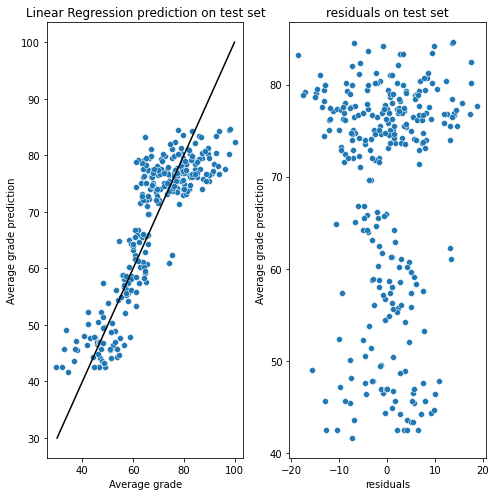

In [17]:
residuals_test = y_test - y_test_pred

fig, ax = plt.subplots(1,2, figsize=(7,7))
line = [30, y.max()]

plot_1 = sns.scatterplot(y=y_test_pred, x=y_test, ax=ax[0])
plot_1 = sns.lineplot(y=line, x=line, ax=ax[0], color='black')
plot_1.set(title='Linear Regression prediction on test set', xlabel='Average grade', ylabel='Average grade prediction')

plot_2 = sns.scatterplot(y=y_test_pred, x=residuals_test, ax=ax[1])
plot_2.set(title='residuals on test set', xlabel='residuals', ylabel='Average grade prediction')


plt.tight_layout()
plt.show()

### Storing predictions in the dataframe:

In [13]:
y_test_pred_df = pd.DataFrame(y_test_pred)

y_test_pred_df.head()

,0
0,82.31
1,76.52
2,46.53
3,78.47
4,76.50


In [14]:
df = data.copy()

df['average_grade_pred_linear'] = y_test_pred_df

df.dropna(inplace=True)

df.to_csv('linear_regression_pred.csv', index_label = False)

### Saving the model:

In [18]:
pickle.dump(lm, open('linear_regression.pkl', 'wb'))